In [1]:
from processed_image import ProcessedImage, read_from_dir, show_image_strip
imgs = list(read_from_dir('..\\Data\\LittleCarDb1'))
[str(img) for img in imgs[0:5]]

['ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-001_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-002_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-005_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-007_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-008_1.jpg (0 in cache)']

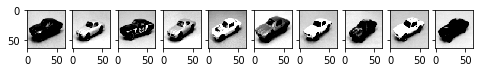

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
_, axes = plt.subplots(1, 10, sharey=True, figsize=(8,1.5))
show_image_strip(imgs, axes)

In [3]:
if False:
    _, axes = plt.subplots(2, 10, sharey=True, figsize=(8,1.5))
    processed_dict = {img.fullpath:img.get_processed_image() for img in imgs}
    show_image_strip(imgs, axes, predicted_dict=processed_dict)

In [4]:
import numpy as np
import random
random.shuffle(imgs)
x_train = [img.get_processed_image(size=128) for img in imgs]
x_train = np.array(x_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))

test_size = int(len(x_train)/10)
x_test = x_train[0:test_size]
x_train = x_train[test_size+1:]
x_train.shape, x_test.shape

((225, 128, 128, 1), (25, 128, 128, 1))

In [12]:
from model_vae_3stage import ModelVae3Stage
all_model = ModelVae3Stage(size=128, in_channels=1, latent_dim=16)
vae, enc, dec = all_model.vae, all_model.encoder, all_model.decoder

In [33]:
vae.fit(x_train, x_train, epochs=500, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

Train on 225 samples, validate on 25 samples
Epoch 1/500
225/225 [==============================] - 0s 884us/step - loss: 310.6774 - val_loss: 663.2554
Epoch 2/500
225/225 [==============================] - 0s 840us/step - loss: 307.8012 - val_loss: 651.7095
Epoch 3/500
225/225 [==============================] - 0s 804us/step - loss: 308.3185 - val_loss: 664.3449
Epoch 4/500
225/225 [==============================] - 0s 813us/step - loss: 310.9442 - val_loss: 652.5574
Epoch 5/500
225/225 [==============================] - 0s 813us/step - loss: 312.3065 - val_loss: 668.3247
Epoch 6/500
225/225 [==============================] - 0s 809us/step - loss: 309.9819 - val_loss: 664.0653
Epoch 7/500
225/225 [==============================] - 0s 822us/step - loss: 310.3063 - val_loss: 673.5148
Epoch 8/500
225/225 [==============================] - 0s 800us/step - loss: 310.0309 - val_loss: 667.5582
Epoch 9/500
225/225 [==============================] - 0s 822us/step - loss: 318.0022 - val_loss: 6

Epoch 77/500
225/225 [==============================] - 0s 813us/step - loss: 312.2121 - val_loss: 671.2537
Epoch 78/500
225/225 [==============================] - 0s 804us/step - loss: 307.5635 - val_loss: 649.0590
Epoch 79/500
225/225 [==============================] - 0s 862us/step - loss: 304.5707 - val_loss: 664.8475
Epoch 80/500
225/225 [==============================] - 0s 818us/step - loss: 301.2048 - val_loss: 650.5527
Epoch 81/500
225/225 [==============================] - 0s 804us/step - loss: 298.9624 - val_loss: 663.5137
Epoch 82/500
225/225 [==============================] - 0s 796us/step - loss: 297.8611 - val_loss: 649.1930
Epoch 83/500
225/225 [==============================] - 0s 809us/step - loss: 297.0660 - val_loss: 648.7467
Epoch 84/500
225/225 [==============================] - 0s 813us/step - loss: 296.2538 - val_loss: 642.3482
Epoch 85/500
225/225 [==============================] - 0s 804us/step - loss: 298.9760 - val_loss: 658.2762
Epoch 86/500
225/225 [======

Epoch 153/500
225/225 [==============================] - 0s 800us/step - loss: 298.2372 - val_loss: 668.5095
Epoch 154/500
225/225 [==============================] - 0s 800us/step - loss: 304.1206 - val_loss: 648.5238
Epoch 155/500
225/225 [==============================] - 0s 804us/step - loss: 302.6316 - val_loss: 669.2748
Epoch 156/500
225/225 [==============================] - 0s 800us/step - loss: 310.9539 - val_loss: 655.3517
Epoch 157/500
225/225 [==============================] - 0s 796us/step - loss: 307.2201 - val_loss: 674.1306
Epoch 158/500
225/225 [==============================] - 0s 809us/step - loss: 310.8600 - val_loss: 655.6322
Epoch 159/500
225/225 [==============================] - 0s 791us/step - loss: 305.5038 - val_loss: 665.0475
Epoch 160/500
225/225 [==============================] - 0s 791us/step - loss: 305.3629 - val_loss: 640.2751
Epoch 161/500
225/225 [==============================] - 0s 809us/step - loss: 302.4004 - val_loss: 662.0328
Epoch 162/500
225/2

Epoch 229/500
225/225 [==============================] - 0s 871us/step - loss: 301.3606 - val_loss: 679.6439
Epoch 230/500
225/225 [==============================] - 0s 880us/step - loss: 296.9698 - val_loss: 633.1057
Epoch 231/500
225/225 [==============================] - 0s 871us/step - loss: 295.1917 - val_loss: 675.5723
Epoch 232/500
225/225 [==============================] - 0s 898us/step - loss: 293.1771 - val_loss: 641.9980
Epoch 233/500
225/225 [==============================] - 0s 889us/step - loss: 295.1127 - val_loss: 671.8466
Epoch 234/500
225/225 [==============================] - 0s 853us/step - loss: 295.7840 - val_loss: 634.4598
Epoch 235/500
225/225 [==============================] - 0s 880us/step - loss: 297.3087 - val_loss: 685.9416
Epoch 236/500
225/225 [==============================] - 0s 867us/step - loss: 302.5123 - val_loss: 644.0459
Epoch 237/500
225/225 [==============================] - 0s 871us/step - loss: 300.3510 - val_loss: 681.7921
Epoch 238/500
225/2

Epoch 305/500
225/225 [==============================] - 0s 818us/step - loss: 297.9031 - val_loss: 684.4419
Epoch 306/500
225/225 [==============================] - 0s 889us/step - loss: 298.3165 - val_loss: 635.6867
Epoch 307/500
225/225 [==============================] - 0s 938us/step - loss: 298.2983 - val_loss: 676.6133
Epoch 308/500
225/225 [==============================] - 0s 889us/step - loss: 297.4703 - val_loss: 638.3355
Epoch 309/500
225/225 [==============================] - 0s 827us/step - loss: 294.1842 - val_loss: 665.4951
Epoch 310/500
225/225 [==============================] - 0s 876us/step - loss: 298.6240 - val_loss: 644.4733
Epoch 311/500
225/225 [==============================] - 0s 947us/step - loss: 294.6731 - val_loss: 666.0701
Epoch 312/500
225/225 [==============================] - 0s 1ms/step - loss: 301.5185 - val_loss: 643.7892
Epoch 313/500
225/225 [==============================] - 0s 907us/step - loss: 295.2316 - val_loss: 662.6929
Epoch 314/500
225/225

Epoch 381/500
225/225 [==============================] - 0s 822us/step - loss: 295.2174 - val_loss: 680.9130
Epoch 382/500
225/225 [==============================] - 0s 805us/step - loss: 286.8674 - val_loss: 638.6301
Epoch 383/500
225/225 [==============================] - 0s 809us/step - loss: 292.1247 - val_loss: 672.9707
Epoch 384/500
225/225 [==============================] - 0s 827us/step - loss: 287.2335 - val_loss: 641.8994
Epoch 385/500
225/225 [==============================] - 0s 818us/step - loss: 293.2391 - val_loss: 673.5588
Epoch 386/500
225/225 [==============================] - 0s 813us/step - loss: 289.6751 - val_loss: 635.8680
Epoch 387/500
225/225 [==============================] - 0s 800us/step - loss: 296.6694 - val_loss: 692.7556
Epoch 388/500
225/225 [==============================] - 0s 822us/step - loss: 293.8776 - val_loss: 638.8375
Epoch 389/500
225/225 [==============================] - 0s 809us/step - loss: 297.5903 - val_loss: 682.4583
Epoch 390/500
225/2

Epoch 457/500
225/225 [==============================] - 0s 840us/step - loss: 291.0116 - val_loss: 660.7935
Epoch 458/500
225/225 [==============================] - 0s 871us/step - loss: 288.9496 - val_loss: 645.7344
Epoch 459/500
225/225 [==============================] - 0s 844us/step - loss: 284.9199 - val_loss: 655.9995
Epoch 460/500
225/225 [==============================] - 0s 849us/step - loss: 283.1541 - val_loss: 644.2192
Epoch 461/500
225/225 [==============================] - 0s 831us/step - loss: 285.3608 - val_loss: 665.1899
Epoch 462/500
225/225 [==============================] - 0s 836us/step - loss: 287.5010 - val_loss: 663.7497
Epoch 463/500
225/225 [==============================] - 0s 844us/step - loss: 285.9735 - val_loss: 668.0883
Epoch 464/500
225/225 [==============================] - 0s 840us/step - loss: 292.2082 - val_loss: 659.9227
Epoch 465/500
225/225 [==============================] - 0s 862us/step - loss: 288.4416 - val_loss: 667.5637
Epoch 466/500
225/2

In [30]:
def show_original_decoded(original, decoded, sz):
    from scipy import ndimage, misc
    from skimage.transform import resize
    
    n = 8  # how many digits we will display
    plt.figure(figsize=(n*2, 4))
    for i in range(n):
        
        ax = plt.subplot(2, n, i+1)
        orig_image = original[i].reshape(128,128)
        plt.imshow(orig_image, cmap='gray')
        
        ax = plt.subplot(2, n, i+1+n)
        decoded_image = decoded[i].reshape(128,128)
        plt.imshow(decoded_image, cmap='gray')
    plt.show()

(8, 128, 128, 1) -> (8, 16) -> (8, 128, 128, 1)


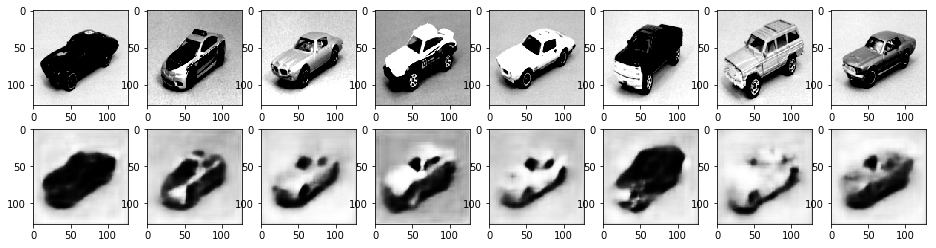

In [31]:
show_examples = np.append(x_train[0:4], x_test[0:4], axis=0)
encoded_latent = enc.predict(show_examples)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(show_examples.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(show_examples, decoded_imgs, 128)

In [9]:
vae.save('model_vae_3stage.h5')

In [32]:
with open("model_vae_3stage.yaml", "w") as yaml_model_file:
    yaml_model_file.write(vae.to_yaml())

In [60]:
import matplotlib.pyplot as plt
sz=128
def g(**kwargs):
    plt.figure(2, figsize=(8,8))
    # x = np.linspace(-10,10,num=1000)
    # plt.plot(x,kwargs['1']/100*x + kwargs['2'])
    # plt.ylim(-5,5)
    # plt.show()
    latent = np.array([list(kwargs.values())])
    # print(type(latent))
    # print(latent.shape)
    # latent.reshape(1,)
    # print(latent)
    decoded = dec.predict(latent)
    plt.imshow(decoded.reshape(sz,sz))
    plt.gray()
    return kwargs['1']

In [61]:
from ipywidgets import interactive_output,Layout
import ipywidgets as widgets

In [63]:
%matplotlib inline
latent_dim = encoded_latent[2].shape[-1]
def createSlider():
    return widgets.IntSlider(value=0,
                             min=-4,max=4,
                             orientation='vertical',
                             layout=Layout(padding='0%'))
kwargs = {str(k):createSlider() for k in range(latent_dim)}
w = interactive_output(g,kwargs)
hbox = widgets.HBox(list(kwargs.values()),
                    layout=Layout(padding='0%'))
display(hbox,w)

Output()